**UPLOAD DATASET**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Instagram_data.csv to Instagram_data.csv


In [17]:
df = pd.read_csv("Instagram_data.csv", encoding = 'latin1')
print(df)

     Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0           3920       2586           1028           619          56     98   
1           5394       2727           1838          1174          78    194   
2           4021       2085           1188             0         533     41   
3           4528       2700            621           932          73    172   
4           2518       1704            255           279          37     96   
..           ...        ...            ...           ...         ...    ...   
114        13700       5185           3041          5352          77    573   
115         5731       1923           1368          2266          65    135   
116         4139       1133           1538          1367          33     36   
117        32695      11815           3147         17414         170   1095   
118        36919      13473           4176         16444        2547    653   

     Comments  Shares  Likes  Profile Visits  Follo

In [18]:
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [19]:
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [20]:
df = df.dropna()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [35]:
df.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


**Analyzing Instagram Reach**

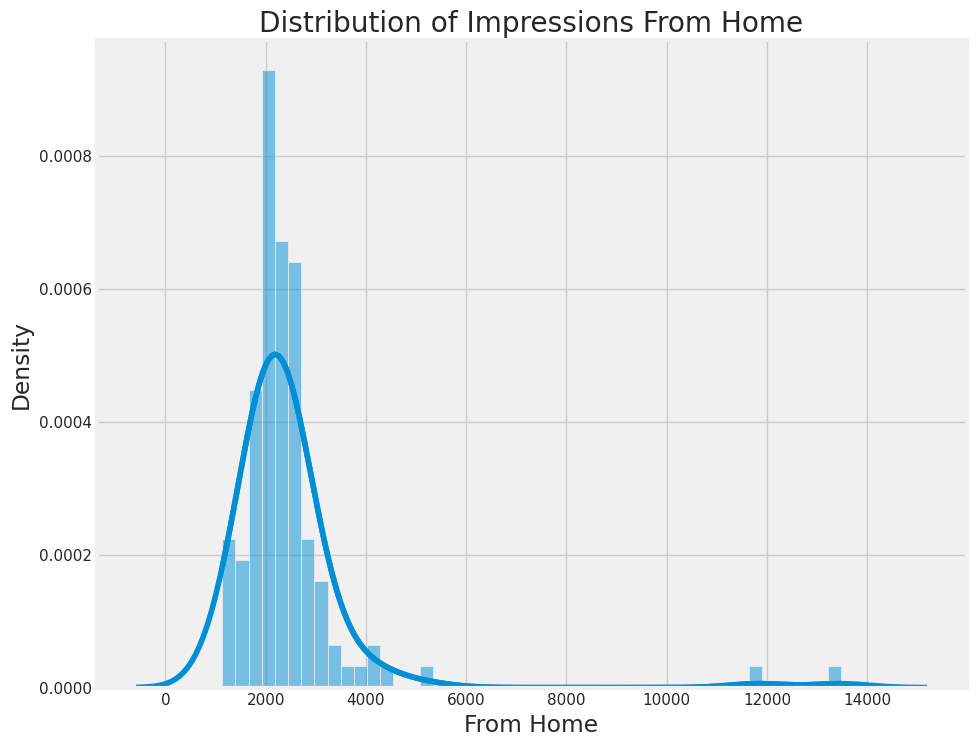

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")

# Create the distribution plot
sns.histplot(df["From Home"], kde=True, stat="density")
sns.kdeplot(df["From Home"])
plt.show()

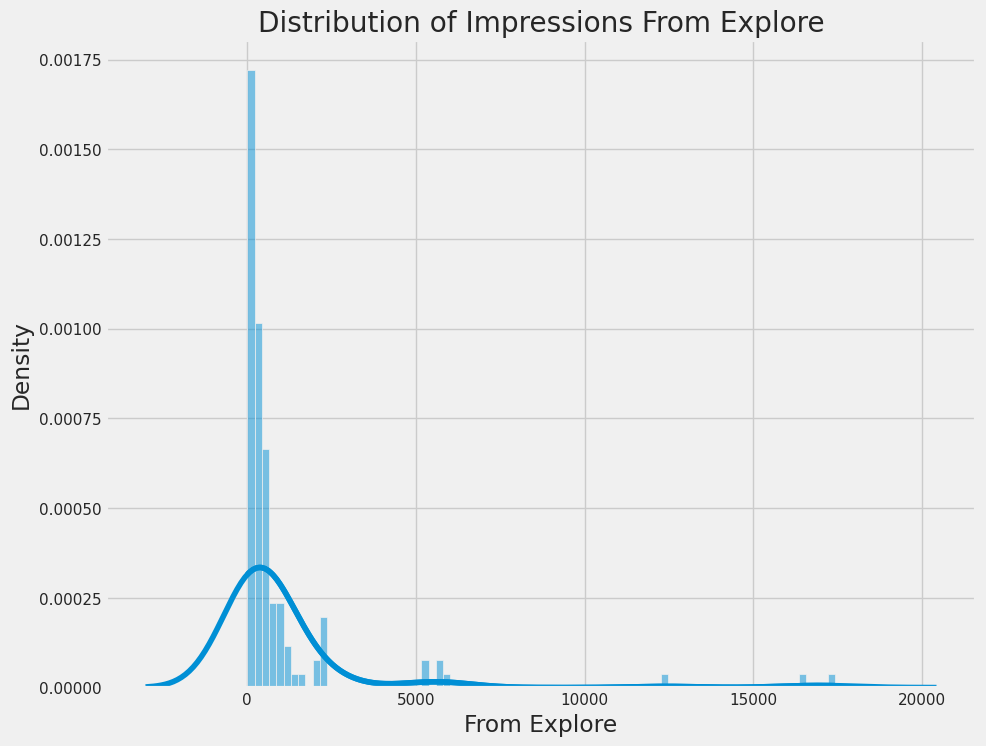

In [43]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Impressions From Explore")
sns.histplot(df["From Explore"], kde=True, stat="density")
sns.kdeplot(df["From Explore"])
plt.show()

In [44]:
home = df["From Home"].sum()
hashtags = df["From Hashtags"].sum()
explore = df["From Explore"].sum()
other = df["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(df, values=values, names=labels,title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

**Analyzing Content**

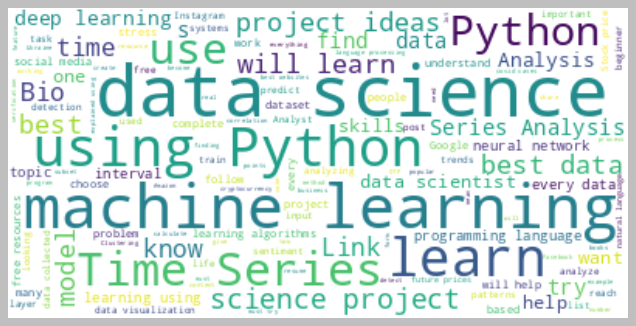

In [49]:
text = " ".join(i for i in df.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="White").generate(text)
plt.style.use('classic')
plt.figure( figsize=(10,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

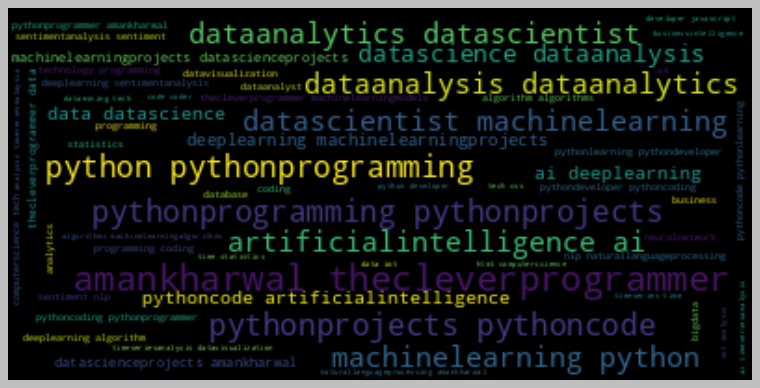

In [51]:
text = " ".join(i for i in df.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Analyzing Relationships**

In [57]:
figure = px.scatter(data_frame = df, x="Impressions",y="Likes", size="Likes", trendline="ols",
title = "Relationship Between Likes and Impressions")
figure.show()

In [61]:
figure = px.scatter(data_frame = df, x="Impressions",y="Comments", size="Comments", trendline="ols",
title = "Relationship Between Comments and Impressions")
figure.show()

In [62]:
figure = px.scatter(data_frame = df, x="Impressions",y="Shares", size="Shares", trendline="ols",
title = "Relationship Between Shares and Impressions")
figure.show()

In [63]:
figure = px.scatter(data_frame = df, x="Impressions",y="Saves", size="Saves", trendline="ols",
title = "Relationship Between Post Saves and Total Impressions")
figure.show()

In [66]:
correlation = df.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


<ipython-input-66-0590b1fd9c8c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [67]:
conversion_rate = (df["Follows"].sum() / df["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


In [68]:
figure = px.scatter(data_frame = df, x="Profile Visits",y="Follows", size="Follows", trendline="ols",
title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

**Instagram Reach Prediction Model**

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
# Define features and target
features = ['Likes', 'Saves', 'Comments', 'Shares','Profile Visits', 'Follows']
target = 'Impressions'

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Initialize models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor()
tree_regressor = DecisionTreeRegressor()
svr_regressor = SVR(kernel='linear',C=1.0,   )

# Train models
linear_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
svr_regressor.fit(X_train, y_train)

SVR(kernel='linear')

In [88]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

# Predict using trained models
linear_predictions = linear_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)

# Create an instance of SVR
svr_regressor = SVR(kernel='linear', C=1.0)

# Fit the SVR model to the training data
svr_regressor.fit(X_train, y_train)

# Predict using the SVR model
svr_predictions = svr_regressor.predict(X_test)

# Evaluate models
linear_mse = mean_squared_error(y_test, linear_predictions)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)

linear_r2 = r2_score(y_test, linear_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)
svr_r2 = r2_score(y_test, svr_predictions)

print(f"Linear Regression - MSE: {linear_mse}, R-squared: {linear_r2}")
print(f"Random Forest - MSE: {random_forest_mse}, R-squared: {random_forest_r2}")
print(f"SVR - MSE: {svr_mse}, R-squared: {svr_r2}")


Linear Regression - MSE: 4746059.117340453, R-squared: 0.8777977785012779
Random Forest - MSE: 5429288.096916667, R-squared: 0.8602058992110544
SVR - MSE: 3902383.7884331513, R-squared: 0.8995208537658589


**Conclusion:**
An Instagram Reach Prediction Model using Support Vector Machines can offer valuable insights for content creators and marketers to optimize their Instagram post strategies, resulting in better engagement and increased visibility. Proper data preprocessing, feature selection, model training, and evaluation are key to building an accurate and effective prediction model.
